## Week 2: PANDAS

_updated 2025-01-15_

In this script, we will look at some penguins.  You can reaad up on this dataset at https://allisonhorst.github.io/palmerpenguins/.  We will be using a Python formatted version of this, read up on it here: https://pypi.org/project/palmerpenguins/, or just search for it:

##### Markdown

This cell is formatted as "Markdown" - this allows me to use markdown to write lovely equations such as:

$$x = \frac{-b \pm \sqrt{b^2-4ac}}{2a}$$

if $ax^2 +bx+c = 0$.


##### Why Jupyter?

We can alternate code cells vs. markdown cells, allowing for an easy display. Also, you can see the input and output, without me having to run the code

In [2]:
## code blocks should have comments.

## print statements always show up!
print(5+7)

x=6209

##Last thing shows up
x+5

12


6214

### Markdown block

text goes here

_italics_

* points
* point 2

**BOLD**

math: $x^2-3$


In [4]:
##in our first cell, we import any libraries/ modules / packages we will need

## pandas is the dplyr of python, it lets us deal with dataframes
import pandas


## we're going to use two graphic packages
import matplotlib.pyplot as plt
import seaborn as sns

## and mkae sure our plots look good: % is pronounced "magic" which is fun
%matplotlib inline


In [5]:
## Today we will look at a built in dataset, called Palmer's Penguins.
## We could install the penguins library, but it is easiest to use a library that exists already
## We would install with:
## `! pip install palmerpenguins`

penguins = sns.load_dataset("penguins")


# Heading 1
## Heading 2

`pip install` or `conda install` on the terminal.

OR Raw cell
%%bash  (Amy will double check)

### Describing the data: EDA
#### Exploratory Data Analysis

We should always begin by looking at the data:

In [8]:
## What have we got here?
# How many rows?  How many columns?

print(penguins.shape)



## just rows: 
print("there are ",penguins.shape[0], " rows")
print("there are ",penguins.shape[1], " columns")


(344, 7)
there are  344  rows
there are  7  columns


In [9]:
## What are the columns like?


penguins.describe(include = "all").round(2)

## include all means both numeric and catagorical columns

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.00,342.00,342.00,342.00,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.92,17.15,200.92,4201.75,NaN
std,NaN,NaN,5.46,1.97,14.06,801.95,NaN
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN
25%,NaN,NaN,39.22,15.60,190.00,3550.00,NaN
50%,NaN,NaN,44.45,17.30,197.00,4050.00,NaN
75%,NaN,NaN,48.50,18.70,213.00,4750.00,NaN


In [10]:
## let's see just the first few rows:



penguins.head(7)

penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


### Are there issues with the data?

Find the number of missing Values or NaN in each column:


In [12]:
## How many NA values do we have?
penguins.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
## Which rows are null for a single column?

penguins[penguins['bill_length_mm'].isna()]



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [14]:
## Or  any of the columns:

penguins[penguins.isna().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [15]:
## We could also cut the NA rows

penguins_no_na=penguins.dropna()

penguins_no_na

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Answering Questions about the Data

Find the Number of penguins who:
* are from Dream Island
* have a bill length of more than 40 mm
* Are from Dream Island and have a bill length of more than 40 mm

In [17]:
## filter in Excel == query in pandas
## be really careful about those quotes!

print("the number of penguins on Dream island is: ", penguins.query("island =='Dream'").shape[0])

penguins.query("island =='Dream'")


the number of penguins on Dream island is:  124


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
31,Adelie,Dream,37.2,18.1,178.0,3900.0,Male
32,Adelie,Dream,39.5,17.8,188.0,3300.0,Female
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


In [18]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [19]:
## Try it!  bill length of more than 40 mm
penguins.query("bill_length_mm > 40")


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
## both? Interaction, both are true

penguins.query("island =='Dream' & bill_length_mm > 40")


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
37,Adelie,Dream,42.2,18.5,180.0,3550.0,Female
41,Adelie,Dream,40.8,18.4,195.0,3900.0,Male
43,Adelie,Dream,44.1,19.7,196.0,4400.0,Male
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


In [21]:
## Either?

penguins.query("island =='Dream' | bill_length_mm > 40")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Can we do the same thing with a group?

In [23]:
## for this we can query (like a filter) or Group.  Let's group:
print("Breakdown by Island: ")

# size = count
#

print(penguins.groupby(by= "island").size())


## try filtering first:

print("") # Blank Line
print("Breakdown by island, but only those with bill length of more than 40 mm:")

## ?
print(penguins.query("bill_length_mm > 40").groupby(by= "island").size())
## Chaining command

Breakdown by Island: 
island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

Breakdown by island, but only those with bill length of more than 40 mm:
island
Biscoe       139
Dream         85
Torgersen     18
dtype: int64


##  Let's do some summarizing!

* Smallest Bill Length:
* Biggest Bill Length:
* What about of Adelie penguins on Dream Island?
* How about Chinstrap penguins on Dream Island?


In [25]:
## lets do some summarizing:

print(penguins["bill_length_mm"].describe().round(2))

print(penguins.agg({"bill_length_mm":['max','min']}).round(2))
print("")
print(penguins.query("island == 'Dream' and species == 'Adelie'").groupby("bill_length_mm").agg({"bill_length_mm":['max','min']}).round(2))
print("")
print(penguins.query("island == 'Dream' and species == 'Chinstrap'").agg({"bill_length_mm":['max','min']}).round(2) )
print("")
print(penguins.query("island == 'Dream' and species == 'Adelie'"))
print("")
print(penguins.query("island == 'Dream' and species == 'Chinstrap'") )
print("")
#print(penguins.groupby(["island"]).agg({"bill_length_mm":['max']}).round(2))


count    342.00
mean      43.92
std        5.46
min       32.10
25%       39.22
50%       44.45
75%       48.50
max       59.60
Name: bill_length_mm, dtype: float64
     bill_length_mm
max            59.6
min            32.1

               bill_length_mm      
                          max   min
bill_length_mm                     
32.1                     32.1  32.1
33.1                     33.1  33.1
34.0                     34.0  34.0
35.6                     35.6  35.6
35.7                     35.7  35.7
36.0                     36.0  36.0
36.2                     36.2  36.2
36.3                     36.3  36.3
36.4                     36.4  36.4
36.5                     36.5  36.5
36.6                     36.6  36.6
36.8                     36.8  36.8
36.9                     36.9  36.9
37.0                     37.0  37.0
37.2                     37.2  37.2
37.3                     37.3  37.3
37.5                     37.5  37.5
37.6                     37.6  37.6
37.8              

In [26]:
 
#penguins.groupby("island").agg({"bill_length_mm":['min', 'median','mean', 'max','count' ]}).round(2)

In [27]:
## Or by island and species:
penguins.groupby(["island","species"]).agg({"bill_length_mm":['min', 'median','mean', 'max','count' ]}).round(2)

bill_length_mm                          
                               min median   mean   max count
island    species                                           
Biscoe    Adelie              34.5  38.70  38.98  45.6    44
          Gentoo              40.9  47.30  47.50  59.6   123
Dream     Adelie              32.1  38.55  38.50  44.1    56
          Chinstrap           40.9  49.55  48.83  58.0    68
Torgersen Adelie              33.5  38.90  38.95  46.0    51

In [28]:
## or just answer the questions:


## Visualizing

We start with matplotlib - the basic one.  They all work this way

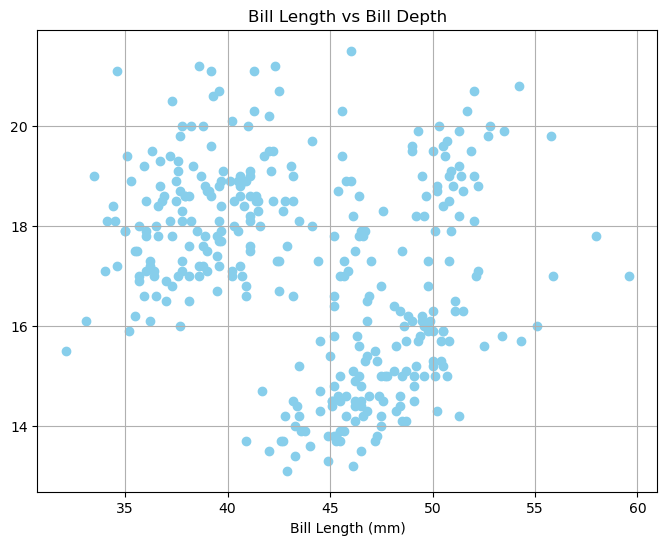

In [30]:
# Basic scatter plot
# matplotlib is the basic plot

#Step 1. Declare the variable 
#Step 2. Scatter plat
#Step 3 variables 


## declare that you are making a plot


plt.figure(figsize=(8, 6))

## What kind of plot?  What are the x and y acces?
plt.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"], color='skyblue')

## titles and appearance 
plt.title("Bill Length vs Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.grid(True)

## have is show up
plt.show()

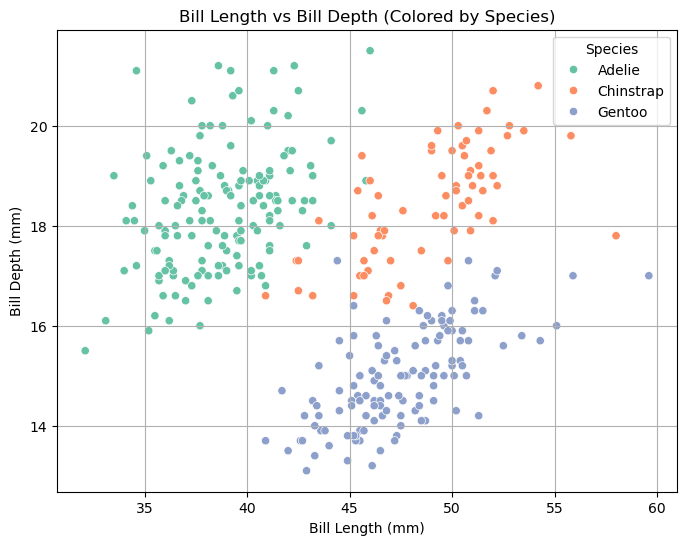

In [31]:
## or we can colour by species:  This is a different

# Create a scatter plot with species colored points
plt.figure(figsize=(8, 6))

##this uses seaborn instead of just matplotlib:
sns.scatterplot(x="bill_length_mm", y="bill_depth_mm", hue="species", data=penguins, palette="Set2")
plt.title("Bill Length vs Bill Depth (Colored by Species)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.grid(True)
plt.legend(title="Species")
plt.show()

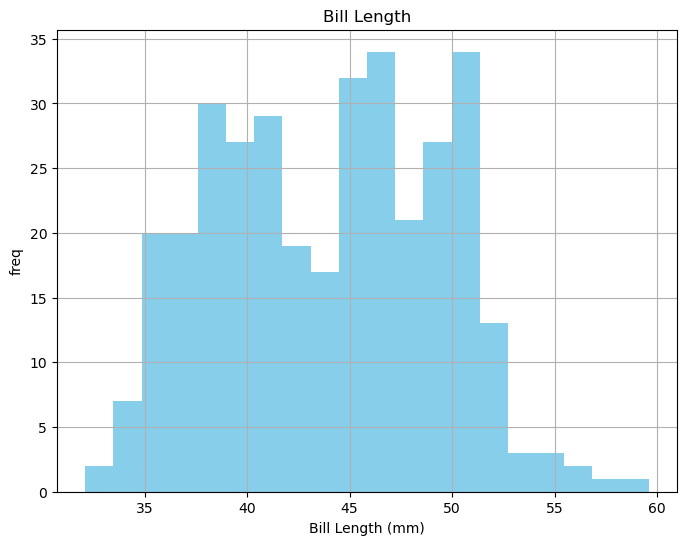

In [32]:
# Basic histogram


## declare that you are making a plot
plt.figure(figsize=(8, 6))

## What kind of plot?  What are the x and y acces?
plt.hist(penguins["bill_length_mm"], bins =20, color='skyblue')

## titles and appearance 
plt.title("Bill Length")
plt.xlabel("Bill Length (mm)")
plt.ylabel("freq")
plt.grid(True)

## have is show up
plt.show()


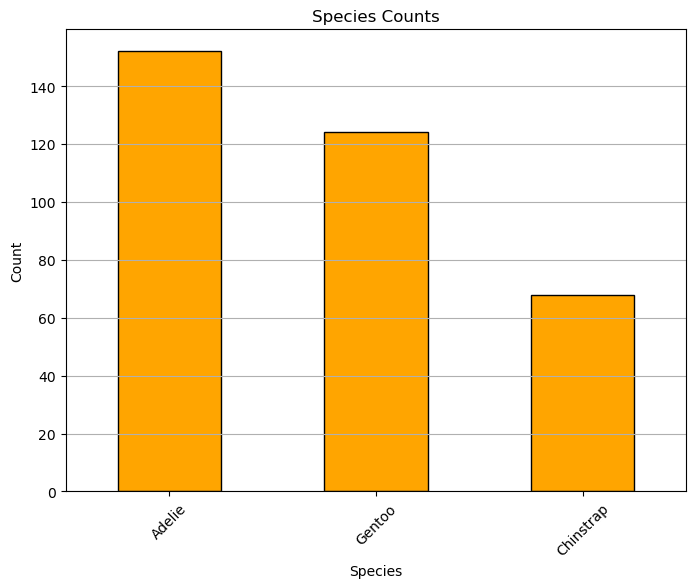

In [33]:
# Basic bar plot
species_counts = penguins["species"].value_counts()
plt.figure(figsize=(8, 6))
species_counts.plot(kind='bar', color='orange', edgecolor = "black")
plt.title("Species Counts")
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

### Seaborn

When plots need to get fancy, we start using other libraries.  My personal favourite is below.

<Figure size 1000x600 with 0 Axes>

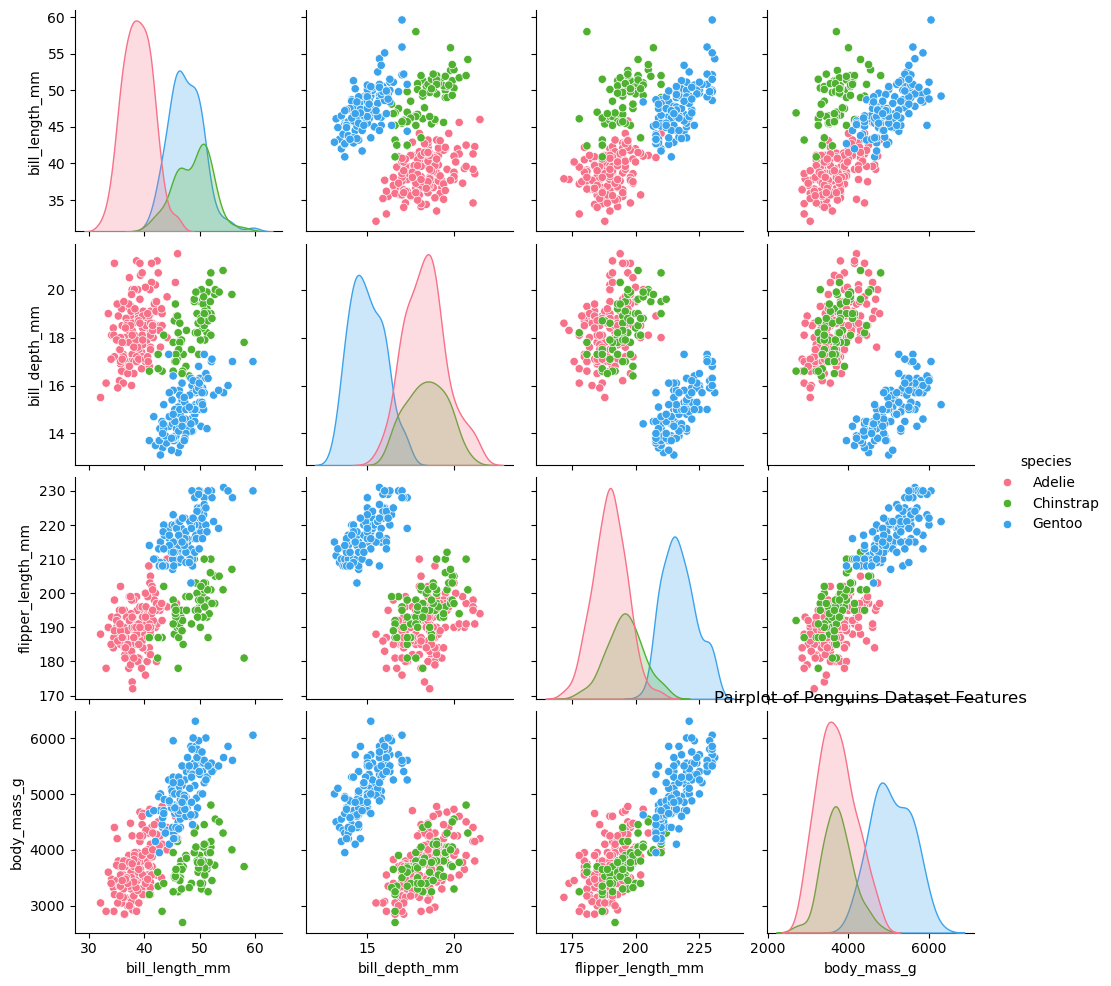

In [35]:
## let's get fancy:
## plt is basic, sns is our advanced:

# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(penguins, hue='species', palette='husl')
plt.title('Pairplot of Penguins Dataset Features')
plt.show()

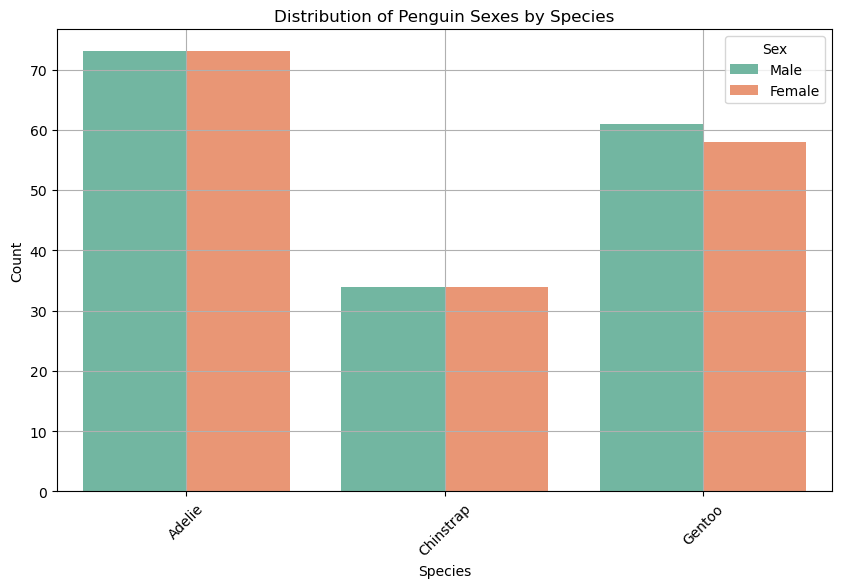

In [36]:
# Create a count plot for penguin sexes, 
plt.figure(figsize=(10, 6))

## un italicize this:
sns.countplot(x="species", hue="sex", data=penguins, palette="Set2")

plt.title("Distribution of Penguin Sexes by Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

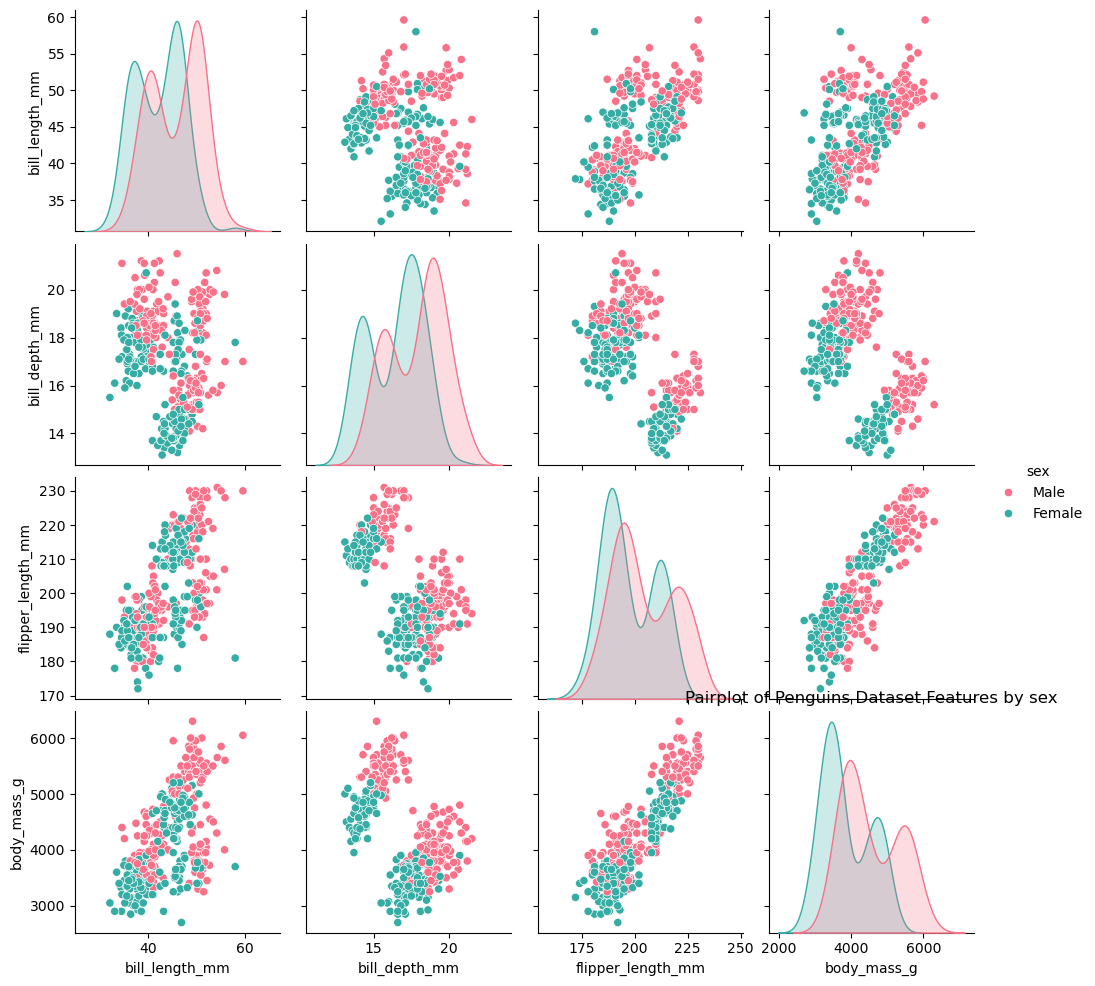

In [37]:
## or fancy again:
# Visualize the dataset by sex?

# Visualize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(penguins, hue='sex', palette='husl')
plt.title('Pairplot of Penguins Dataset Features by sex')
plt.show()

## Wrangling:  reshaping the data

Sometimes we want a data set that looks different than what we started with.

This code will reshape the penguin dataset using pandas.melt(), where the columns "species", "island", and "sex" are kept as identifier variables, and all other columns are melted into two columns: "measurement" (containing the original column names) and "value" (containing the corresponding values). This reshaped dataset may be more suitable for certain types of analysis or visualization tasks.


In [39]:
# Melt!

melt1 = pandas.melt(penguins, id_vars=["species", "island", "sex"], var_name = "measurement")



print (melt1)

print(melt1.query("species == 'Adelie'"))


     species     island     sex     measurement   value
0     Adelie  Torgersen    Male  bill_length_mm    39.1
1     Adelie  Torgersen  Female  bill_length_mm    39.5
2     Adelie  Torgersen  Female  bill_length_mm    40.3
3     Adelie  Torgersen     NaN  bill_length_mm     NaN
4     Adelie  Torgersen  Female  bill_length_mm    36.7
...      ...        ...     ...             ...     ...
1371  Gentoo     Biscoe     NaN     body_mass_g     NaN
1372  Gentoo     Biscoe  Female     body_mass_g  4850.0
1373  Gentoo     Biscoe    Male     body_mass_g  5750.0
1374  Gentoo     Biscoe  Female     body_mass_g  5200.0
1375  Gentoo     Biscoe    Male     body_mass_g  5400.0

[1376 rows x 5 columns]
     species     island     sex     measurement   value
0     Adelie  Torgersen    Male  bill_length_mm    39.1
1     Adelie  Torgersen  Female  bill_length_mm    39.5
2     Adelie  Torgersen  Female  bill_length_mm    40.3
3     Adelie  Torgersen     NaN  bill_length_mm     NaN
4     Adelie  Torgersen

### Pivot

Everyone knows the best part of Excel is the PivotTable.  Well, here we don't even need Excel!  And we can use the median, which isn't available in Excel PivotTables.

In [41]:
pivot_penguins = pandas.pivot_table(penguins, index=["species", "island", "sex"], 
                                values=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
                                aggfunc='median')

In [42]:
## show this rounded to 2 decimal places...
pivot_penguins.round(2)

bill_depth_mm  bill_length_mm  body_mass_g  \
species   island    sex                                                  
Adelie    Biscoe    Female          17.70           37.75       3375.0   
                    Male            18.90           40.80       4000.0   
          Dream     Female          17.80           36.80       3400.0   
                    Male            18.65           40.25       3987.5   
          Torgersen Female          17.45           37.60       3400.0   
                    Male            19.20           41.10       4000.0   
Chinstrap Dream     Female          17.65           46.30       3550.0   
                    Male            19.30           50.95       3950.0   
Gentoo    Biscoe    Female          14.25           45.50       4700.0   
                    Male            15.70           49.50       5500.0   

                            flipper_length_mm  
species   island    sex                        
Adelie    Biscoe    Female              187.0  
                    Male                191.0  
          Dream     Female              188.0  
                    Male                190.5  
          Torgersen Female              189.0  
                    Male                195.0  
Chinstrap Dream     Female              192.0  
                    Male                200.5  
Gentoo    Biscoe    Female              212.0  
                    Male                221.0

## Merging two datasets together
 
In R, this is a join, but in pandas we use `.merge()`, and use the options to specify how it wil merge.

In [44]:
## What do penguins like?

# Create a new DataFrame with hypothetical penguin data
likes = pandas.DataFrame({
    "species": ["Emperor", "Gentoo", "Chinstrap", "Adelie", "Pingu"],
    "preferred_food": ["Fish", "Krill", "Squid", "Fish", "Krill"],
    "average_diving_depth (m)": [200, 100, 150, 50, 180],
    "preferred_nesting_material": ["Pebbles", "Grass", "Sand", "Rocks", "Ice"]
})


In [45]:
likes

,species,preferred_food,average_diving_depth (m),preferred_nesting_material
0,Emperor,Fish,200,Pebbles
1,Gentoo,Krill,100,Grass
2,Chinstrap,Squid,150,Sand
3,Adelie,Fish,50,Rocks
4,Pingu,Krill,180,Ice


In [46]:
## We don't have time to look at all of the merges and joins today, but here's a basic left join:

## what happens when you change "left" to "right"?  "inner"?  "outer"?

new_penguins = pandas.merge(penguins, likes, how = "right", on ="species")

new_penguins

## look forward to more joins in a future week.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,preferred_food,average_diving_depth (m),preferred_nesting_material
0,Emperor,NaN,NaN,NaN,NaN,NaN,NaN,Fish,200,Pebbles
1,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female,Krill,100,Grass
2,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male,Krill,100,Grass
3,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female,Krill,100,Grass
4,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male,Krill,100,Grass
...,...,...,...,...,...,...,...,...,...,...
341,Adelie,Dream,36.0,17.8,195.0,3450.0,Female,Fish,50,Rocks
342,Adelie,Dream,37.8,18.1,193.0,3750.0,Male,Fish,50,Rocks
343,Adelie,Dream,36.0,17.1,187.0,3700.0,Female,Fish,50,Rocks
344,Adelie,Dream,41.5,18.5,201.0,4000.0,Male,Fish,50,Rocks


## Creating new colums

Let's 
* Rename a column
* Create some new columns
* lambda functions
* dropping columns



In [48]:
## renaming a column:  Can you take the mm out?



In [49]:
## or creating a new one:


In [50]:
## or with a lambda

## penguins.assign(bill_length_cm = lambda x: x.bill_length_mm/10)

In [51]:
## or just assign

## penguins.assign(bill_ratio = penguins["bill_length_mm"]/penguins["bill_depth_mm"])

In [52]:
## note that we haven't changed penguins!
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [53]:
## Dropping: drop bill length and depth



## Chaining:

It's the pipe of the python world!  It's not as useful, as the Object Oriented nature makes things just easier - you can write:

```
penguins.query("bill_length_mm > 40").groupby(by = "island").size()
```

which is the same as the R code:

```
penguins %>%
  filter(bill_length_mm > 40)%>%
  group_by(island) %>% 
  summarize(n())
```

If we do want this in multiple lines, we can chain, by adding in brackets:

```
(penguins.query("bill_length_mm > 40")
    .groupby(by = "island")
    .size())
```